# Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, cohen_kappa_score

# Import data

In [2]:
df=pd.read_csv('crime 2.csv')
df=pd.read_csv('crime 2.csv')


In [3]:
df.head()

,REGION,GARDA DIVISION,OFFENCE CODE,OFFENCE,TYPE OF OFFENCE,2003Q1,2003Q2,2003Q3,2003Q4,2004Q1,...,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3
0,NORTHERN REGION,CAVAN/MONAGHAN,111,Murder,HOMICIDE OFFENCES,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,NORTHERN REGION,CAVAN/MONAGHAN,112,Manslaughter,HOMICIDE OFFENCES,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,NORTHERN REGION,CAVAN/MONAGHAN,113,Infanticide,HOMICIDE OFFENCES,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NORTHERN REGION,CAVAN/MONAGHAN,12,Dangerous driving leading to death,HOMICIDE OFFENCES,1,0,1,0,0,...,1,1,1,0,0,0,1,0,0,0
4,NORTHERN REGION,CAVAN/MONAGHAN,21,Rape and sexual assault,SEXUAL OFFENCES,24,15,5,5,14,...,16,8,14,23,21,13,23,19,20,17


In [4]:
df.isnull().sum()

REGION             0
GARDA DIVISION     0
OFFENCE CODE       0
OFFENCE            0
TYPE OF OFFENCE    0
                  ..
2018Q3             0
2018Q4             0
2019Q1             0
2019Q2             0
2019Q3             0
Length: 72, dtype: int64

In [5]:
df.dtypes

REGION             object
GARDA DIVISION     object
OFFENCE CODE        int64
OFFENCE            object
TYPE OF OFFENCE    object
                    ...  
2018Q3              int64
2018Q4              int64
2019Q1              int64
2019Q2              int64
2019Q3              int64
Length: 72, dtype: object

# Label Encoder

In [6]:
df['OFFENCE'].unique()

array(['Murder', 'Manslaughter', 'Infanticide',
       'Dangerous driving leading to death', 'Rape and sexual assault',
       'Other sexual offences', 'Murder-attempt', 'Murder-threat',
       'Harassment and related offences',
       'Assault causing harm/ poisoning', 'Other assault',
       'Dangerous driving causing serious bodily harm',
       'Driving/in charge of a vehicle while over legal alcohol limit',
       'Driving/in charge of a vehicle under the influence of drugs',
       'Endangerment with potential for serious harm/death',
       'Abandoning a child/ child neglect and cruelty',
       'Unseaworthy/dangerous use of boat or ship',
       'False alarm/interference with aircraft or air transport facilities',
       'Endangering traffic offences', 'False imprisonment',
       'Abduction of person under 16 years of age',
       'Human trafficking offences',
       'Robbery of an establishment or institution',
       'Robbery of cash or goods in transit', 'Robbery from the p

In [7]:
lbl_encode=LabelEncoder()
df['REGION']=lbl_encode.fit_transform(df['REGION'])
df['GARDA DIVISION']=lbl_encode.fit_transform(df['GARDA DIVISION'])
df['OFFENCE']=lbl_encode.fit_transform(df['OFFENCE'])
df['TYPE OF OFFENCE']=lbl_encode.fit_transform(df['TYPE OF OFFENCE'])


In [8]:
df

,REGION,GARDA DIVISION,OFFENCE CODE,OFFENCE,TYPE OF OFFENCE,2003Q1,2003Q2,2003Q3,2003Q4,2004Q1,...,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3
0,2,0,111,30,6,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,2,0,112,29,6,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,2,0,113,26,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,12,11,6,1,0,1,0,0,...,1,1,1,0,0,0,1,0,0,0
4,2,0,21,47,11,24,15,5,5,14,...,16,8,14,23,21,13,23,19,20,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,0,10,136,52,9,8,5,6,6,7,...,8,5,3,10,4,5,5,6,16,9
1620,0,10,151,33,8,3,0,0,7,0,...,2,3,0,2,0,0,2,5,4,5
1621,0,10,152,36,8,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
1622,0,10,153,41,8,2,1,0,1,2,...,1,2,1,0,1,0,0,0,1,0


In [9]:
lbl_encode=LabelEncoder()
lbl_encode.fit_transform(df['REGION'])

array([2, 2, 2, ..., 0, 0, 0], dtype=int64)

In [10]:
lbl_encode=LabelEncoder()
lbl_encode.fit_transform(df['GARDA DIVISION'])

array([ 0,  0,  0, ..., 10, 10, 10], dtype=int64)

In [11]:
lbl_encode=LabelEncoder()
lbl_encode.fit_transform(df['OFFENCE'])

array([30, 29, 26, ..., 36, 41, 34], dtype=int64)

In [12]:
lbl_encode=LabelEncoder()
lbl_encode.fit_transform(df['TYPE OF OFFENCE'])

array([6, 6, 6, ..., 8, 8, 8], dtype=int64)

In [13]:
df.head()

,REGION,GARDA DIVISION,OFFENCE CODE,OFFENCE,TYPE OF OFFENCE,2003Q1,2003Q2,2003Q3,2003Q4,2004Q1,...,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3
0,2,0,111,30,6,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,2,0,112,29,6,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,2,0,113,26,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,12,11,6,1,0,1,0,0,...,1,1,1,0,0,0,1,0,0,0
4,2,0,21,47,11,24,15,5,5,14,...,16,8,14,23,21,13,23,19,20,17


# Test and Split

In [14]:
x=df.drop("OFFENCE",axis=1)
y=df["OFFENCE"]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print(len(y_train))
print(len(y_test))


1299
325


# Decision Tree Classifier

In [16]:
from sklearn import tree
dt_clf=tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(x_train, y_train)
dt_clf.score(x_test, y_test)

y_pred= dt_clf.predict(x_test)
dt_clf.score(x_test, y_test)


0.17846153846153845

In [17]:
y_pred1= dt_clf.predict(x_test)
dt_clf.score(x_test, y_test)

0.17846153846153845

In [18]:
print('Decision Tree Classifier' + '\n')
print(classification_report(y_test,y_pred1))

print('\n')

print('Confusion matrix')

Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         7
           7       0.11      1.00      0.19         3
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         4
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         9
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         6
 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


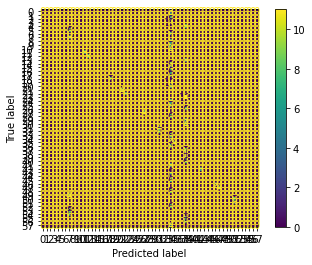

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt_clf, x_test, y_test)
plt.show()

In [20]:
#Accuracy= accuracy_score(y_test, y_pred) 
#Kappa= cohen_kappa_score(y_test, y_pred)
#Accuracy, Kappa

In [21]:
#y_pred= dt_clf.predict(x_test)
#from sklearn.metrics import confusion_matrix
#confusion_matrix(y_test, y_pred)

# Random Forest Classifier

In [21]:
from sklearn import ensemble
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
rf_clf= ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train, y_train)
rf_clf.score(x_train, y_train)
y_pred= rf_clf.predict(x_test)
rf_clf.score(x_test, y_test)

0.8523076923076923

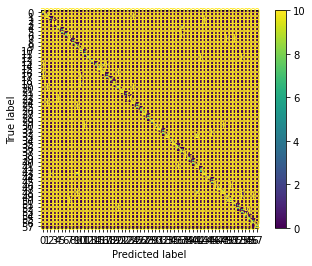

In [22]:
plot_confusion_matrix(rf_clf, x_test, y_test)
plt.show()

In [23]:
print('Random Forest Classifier' + '\n')
print(classification_report(y_test,y_pred))

print('\n')

print('Confusion matrix')

Random Forest Classifier

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         3
           1       0.67      0.80      0.73         5
           2       0.88      0.88      0.88         8
           3       1.00      1.00      1.00        10
           4       0.75      0.60      0.67         5
           5       1.00      1.00      1.00         6
           6       1.00      0.86      0.92         7
           7       0.50      0.33      0.40         3
           8       1.00      1.00      1.00         5
           9       0.58      1.00      0.74         7
          10       0.67      1.00      0.80         4
          11       0.83      1.00      0.91         5
          12       1.00      0.60      0.75         5
          13       1.00      1.00      1.00         3
          14       1.00      0.56      0.71         9
          15       1.00      1.00      1.00         4
          16       0.67      0.67      0.67         6
 

# Naive Bayes Classifier

In [24]:
from sklearn.naive_bayes import GaussianNB
nb_clf= GaussianNB()
nb_clf.fit(x_train, y_train)
nb_clf.score(x_train, y_train)
y_pred3= nb_clf.predict(x_test)
nb_clf.score(x_test, y_test)

0.9969230769230769

In [25]:
print('Naive Bayes Classifier' + '\n')
print(classification_report(y_test,y_pred3))

print('\n')

print('Confusion matrix')

Naive Bayes Classifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         9
          15       1.00      1.00      1.00         4
          16       0.86      1.00      0.92         6
   

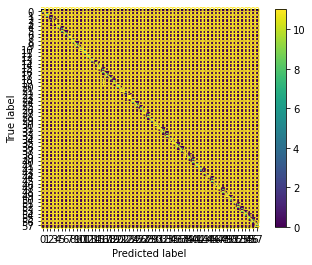

In [26]:
plot_confusion_matrix(nb_clf, x_test, y_test)
plt.show()

In [27]:
#from sklearn.model_selection import cross_val_score
#scores = cross_val_score(rf_clf, x, y, scoring='r2', cv=10)
#scores

In [53]:
#print(np.mean(scores))

In [54]:
#from sklearn.naive_bayes import GaussianNB
#nb_clf= GaussianNB()
#nb_clf.fit(x_train, y_train)
#nb_clf.score(x_train, y_train)

In [55]:
#from sklearn.model_selection import cross_val_score
#scores = cross_val_score(nb_clf, x, y, scoring='r2', cv=10)
#scores

In [56]:
#print(np.mean(scores))

# K-Nearest Neighbour Classifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf= KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(x_train, y_train)
knn_clf.score(x_train, y_train)
y_pred4= knn_clf.predict(x_test)
knn_clf.score(x_test, y_test)

0.76

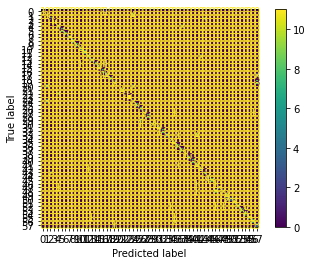

In [29]:
plot_confusion_matrix(knn_clf, x_test, y_test)
plt.show()

In [30]:
print('K-Nearest Neighbour Classifier' + '\n')
print(classification_report(y_test,y_pred4))

print('\n')

print('Confusion matrix')

K-Nearest Neighbour Classifier

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.14      0.20      0.17         5
           2       0.71      0.62      0.67         8
           3       1.00      1.00      1.00        10
           4       0.43      0.60      0.50         5
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         7
          10       0.80      1.00      0.89         4
          11       1.00      1.00      1.00         5
          12       0.75      0.60      0.67         5
          13       0.75      1.00      0.86         3
          14       1.00      0.67      0.80         9
          15       1.00      1.00      1.00         4
          16       0.67      1.00      0.80      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic Regression Classifier

In [31]:
from sklearn.linear_model import LogisticRegression
lr_clf= LogisticRegression()
lr_clf.fit(x_train, y_train)
lr_clf.score(x_train, y_train)
y_pred5= lr_clf.predict(x_test)
lr_clf.score(x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5323076923076923

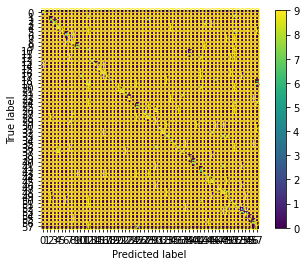

In [32]:
plot_confusion_matrix(lr_clf, x_test, y_test)
plt.show()

In [33]:
print('Logistic Regression Classifier' + '\n')
print(classification_report(y_test,y_pred5))

print('\n')

print('Confusion matrix')

Logistic Regression Classifier

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.00      0.00      0.00         5
           2       0.62      0.62      0.62         8
           3       1.00      0.70      0.82        10
           4       0.50      0.80      0.62         5
           5       1.00      0.17      0.29         6
           6       0.75      0.86      0.80         7
           7       0.20      0.33      0.25         3
           8       0.50      0.80      0.62         5
           9       0.86      0.86      0.86         7
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         5
          13       1.00      1.00      1.00         3
          14       1.00      0.78      0.88         9
          15       1.00      1.00      1.00         4
          16       0.50      0.67      0.57      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SyntaxError: invalid syntax (Temp/ipykernel_16704/2084767577.py, line 2)